# Homework 9: Mediation & Power Analyses

This homework assignment is designed to give you practice with mediation, and with using Monte Carlo methods to conduct power analyses via simulation. You won't need to load in any data for this homework.

---
## 1. Simulating data (2 points)


In this homework, we're going to simulate the relationship between age, word reading experience, and reading comprehension skill. Older children tend to be better at reading comprehension tasks, but this isn't just an inherent part of getting older. It's a combination of gaining more experience with reading, oral language skills, and executive functions development. In this homework, though, we're going to simplify this relationship down to a direct effect of age on reading comprehension (since improvements in oral language skills and executive functions are more guaranteed as children age than reading practice is), and a mediation of word reading experience.

In graphical form: 
![picture](https://drive.google.com/uc?id=1wdm9xuiJhBJor99-9GnicO2_rzkGWtfN)

Writing the relationship out formally: 

$$x = \beta_{xa} a + \beta_{x0} + \epsilon_{x}$$

$$c = \beta_{ca} a + \beta_{cx} x + \beta_{c0} + \epsilon_c$$



$c$ is reading comprehension, $x$ is word reading experience, and $a$ is age. $\beta_{c0}$ and $\beta_{x0}$ are intercept terms for their respective formulas, and $\epsilon_{c}$ and $\epsilon_{x}$ are gaussian noise terms. We'll start by writing a function, `simulate_data`, that can simulate this relationship. The input values are set and the function structure is provided below. Complete the function such that it takes in those input variables and generates $age$, $x$, and $c$ values. Use `runif()` to generate ages. Use `rnorm()` to generate the noise terms. 

In [1]:
sample_size = 100 # How many children in data set? 
age_lo = 80     # minimum age, in months
age_hi = 200    # maximum age, in months
beta_xa = 0.5   # amount by which experience changes for increase of one month in age
beta_x0 = -5    # amount of experience when age = 0 (not interpretable, since minimum age for this data is 80 months)
sd_x = 50       # standard dev of gaussian noise term, epsilon_x
beta_ca = 0.8   # amount that comprehension score improves for every increase of one unit in age
beta_cx = 3     # amount that comprehension score improves for every increase of one unit in reading experience
beta_c0 = 10    # comprehension score when reading experience is 0. 
sd_c = 85      # standard dev of gaussian noise term, epsilon_c

simulate_data <- function(sample_size, age_lo, age_hi, beta_xa, beta_x0, sd_x, beta_ca, beta_cx, beta_c0, sd_c) {
      # WRITE YOUR CODE HERE
    age <- runif(sample_size, age_lo, age_hi) # generate random numbers, length of vector is the sample size, between age lo and age hi
  
  x <- beta_x0 + beta_xa*age + rnorm(sample_size, 0, sd_x) #noise on average is 0, assume normal distribution of noise
  
  c <- beta_c0 + beta_ca*age + beta_cx*x + rnorm(sample_size, 0, sd_c) #more than 1 predictor variable here
      
      return(data.frame(age=age,x=x,c=c)) # it's actually bad form to have a variable named "c" in R, my bad...
}

dat <- simulate_data(sample_size, age_lo, age_hi, beta_xa, beta_x0, sd_x, beta_ca, beta_cx, beta_c0, sd_c)
head(dat)

,age,x,c
,<dbl>,<dbl>,<dbl>
1,105.05908,53.63081,237.8768
2,198.42969,116.57769,478.9138
3,160.42060,63.32978,341.2731
4,199.16419,88.44884,483.6576
5,82.44746,87.79750,287.8759
6,180.76734,91.71561,414.4038


---
## 2. Visualizing Data (1 point)

Load the `tidyverse` library.

In [2]:
# WRITE YOUR CODE HERE
library(tidyverse)


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



a) Plot the relationship between age and reading comprehension. 

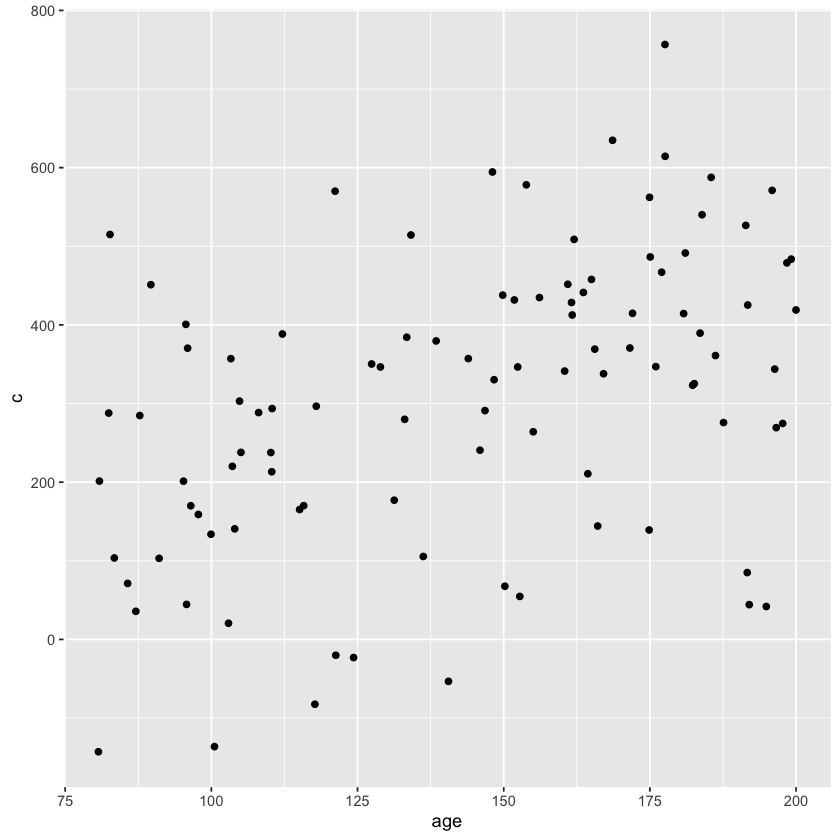

In [3]:
ggplot(data = dat, aes(age, c)) +
  geom_point()


b) Plot the relationship between reading experience, age, and reading comprehension.

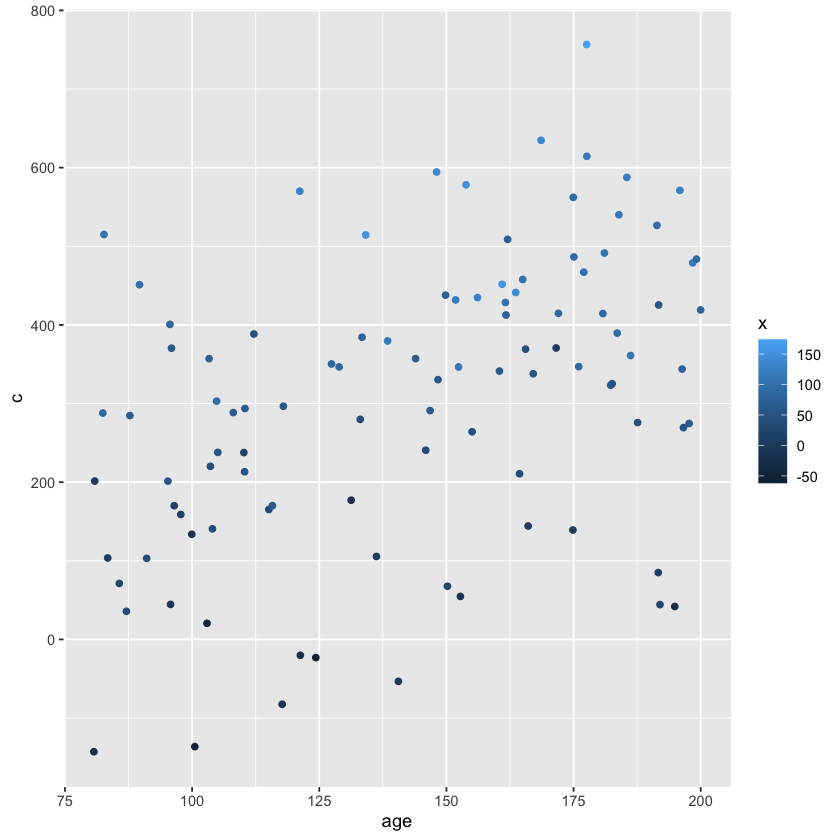

In [4]:
ggplot(data = dat, aes(age, c, color = x)) +
  geom_point()


---
## 3. Mediation Analysis (3 points)

Load the `mediation` library.

In [5]:
install.packages("mediation")
library(mediation)


The downloaded binary packages are in
	/var/folders/y9/6115vtcn20d2bkkn_2tztqfh0000gn/T//RtmpdqOazM/downloaded_packages


Loading required package: MASS


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select


Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


Loading required package: mvtnorm

Loading required package: sandwich

mediation: Causal Mediation Analysis
Version: 4.5.0




Use the `mediate` function to determine whether `x` mediates the relationship between `age` and `c`. Use `summary()` to print the model results. *Hint: see the mediation and moderation tutorial.*

In [6]:
x_age <- lm(x~age, data = dat)
c_x_age <- lm(c~age+x, data = dat)
summary(x_age)
summary(c_x_age)

mediated <- mediate(x_age, c_x_age, treat="age", mediator="x")

summary(mediated)



Call:
lm(formula = x ~ age, data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-116.096  -29.563    4.226   30.558   97.023 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -6.4994    19.2466  -0.338 0.736316    
age           0.4773     0.1301   3.670 0.000395 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 47.55 on 98 degrees of freedom
Multiple R-squared:  0.1208,	Adjusted R-squared:  0.1118 
F-statistic: 13.47 on 1 and 98 DF,  p-value: 0.0003952



Call:
lm(formula = c ~ age + x, data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-181.866  -50.648   -1.257   54.116  220.547 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   7.2143    33.3433   0.216  0.82916    
age           0.7572     0.2402   3.153  0.00215 ** 
x             3.0569     0.1749  17.478  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 82.33 on 97 degrees of freedom
Multiple R-squared:  0.8057,	Adjusted R-squared:  0.8017 
F-statistic: 201.2 on 2 and 97 DF,  p-value: < 2.2e-16



Causal Mediation Analysis 

Quasi-Bayesian Confidence Intervals

               Estimate 95% CI Lower 95% CI Upper p-value    
ACME              1.462        0.716         2.25  <2e-16 ***
ADE               0.756        0.296         1.21   0.004 ** 
Total Effect      2.217        1.318         3.07  <2e-16 ***
Prop. Mediated    0.660        0.454         0.84  <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Sample Size Used: 100 


Simulations: 1000 



Based on the prop mediated output, it seems that the impact of age on reading comprehension ability is mediated by reading experience. This seems logical, as reading experience substantially impacts one's reading comp ability.
> 

---
## 4. Power Analysis via Simulation (4 points)

Now we're going to use our `simulate_data()` function to conduct a power analysis. The goal is to determine how many participants we would need in order to detect both the mediated and the direct effects in this data. 

*Note: We're going to pretend for the sake of simplicity that we don't have any control over the ages of the children we get (so ages are generated using `runif(sample_size, age_lo, age_hi)`, although of course this would be an unusual situation in reality.*

First, write a function, `run_analysis()`, that takes in simulated data and returns a vector containing the ACME and ADE estimates and p-values (these are the `d0`, `d0.p`, `z0`, and `z0.p` features of the mediated model object, e.g., `fitMed$d0.p`). Print this function's output for the data we simulated previously. 

In [7]:
run_analysis <- function(dat) {
  x_age <- lm(x~age, data = dat)
  c_x_age <- lm(c~age+x, data = dat)
  mediated <- mediate(x_age, c_x_age, treat="age", mediator="x")
  return(c(mediated$d0, mediated$d0.p, mediated$z0, mediated$z0.p))
}
run_analysis(dat)


[1] 1.4626249 0.0000000 0.7520495 0.0020000

Next fill in the function `repeat_analysis()` below so that it simulates and analyzes data `num_simulations` times. Store the outputs from each simulation in the `simouts` matrix. Calculate and return the coverage across all the simulations run for both ACME and ADE.

In [9]:
repeat_analysis <- function(num_simulations, alpha, sample_size, age_lo, age_hi, 
        beta_xa, beta_x0, sd_x, beta_ca, beta_cx, beta_c0, sd_c) {
    # Initialize simouts matrix for storing each output from run_analysis()
    simouts <- matrix(rep(NA,num_simulations*4), nrow=num_simulations,ncol=4)
    
    # Start simulating
    for (i in 1:num_simulations) {
      # WRITE YOUR CODE HERE
      data <- simulate_data(sample_size, age_lo, age_hi, beta_xa, beta_x0, sd_x, beta_ca, beta_cx, beta_c0, sd_c)
    simouts[i,] <- run_analysis(data) #simouts is the matrix defined above
    }
    
    # Calculate coverage for both ACME and ADE estimates using p-values in simouts
    # Given that we know that the alt hypothsis is true, how frequently will we accurately
  # reject Ho. 
    ACME_cov =  mean(simouts[,2] <= alpha)
    ADE_cov =  mean(simouts[,4] <= alpha)

    return(list(ACME_cov = ACME_cov, ADE_cov = ADE_cov))
}

Now run the `repeat_analysis()` function using the same parameter settings as above, for 10 simulations, with an alpha criterion of 0.01. 

In [10]:
repeat_analysis(10, 0.01, sample_size, age_lo, age_hi, 
                beta_xa, beta_x0, sd_x, beta_ca, beta_cx, beta_c0, sd_c)


$ACME_cov
[1] 0.9

$ADE_cov
[1] 0.5

Finally, do the same thing (10 simulations, alpha criterion of 0.01) but for 5 different sample sizes: 50, 75, 100, 125, 150. You can do this using `map` (as in the tutorial), or a simple `for` loop, or by calculating each individually. Up to you! This should take around 3 minutes to run. 

In [11]:
# WRITE YOUR CODE HERE

sample_sizes <- c(50, 75, 100, 125, 150)

for(i in sample_sizes) {
  output <- repeat_analysis(10, 0.01, i, age_lo, age_hi, 
                  beta_xa, beta_x0, sd_x, beta_ca, beta_cx, beta_c0, sd_c)
  print(i)
  print(output)
}

[1] 50
$ACME_cov
[1] 0.4

$ADE_cov
[1] 0.4

[1] 75
$ACME_cov
[1] 0.7

$ADE_cov
[1] 0.5

[1] 100
$ACME_cov
[1] 0.9

$ADE_cov
[1] 0.7

[1] 125
$ACME_cov
[1] 1

$ADE_cov
[1] 0.8

[1] 150
$ACME_cov
[1] 1

$ADE_cov
[1] 1



Print your results. 

In [12]:
sample_sizes <- c(50, 75, 100, 125, 150)

for(i in sample_sizes) {
  output <- repeat_analysis(10, 0.01, i, age_lo, age_hi, 
                  beta_xa, beta_x0, sd_x, beta_ca, beta_cx, beta_c0, sd_c)
  print(i)
  print(output)
}


[1] 50
$ACME_cov
[1] 0.7

$ADE_cov
[1] 0.2

[1] 75
$ACME_cov
[1] 0.5

$ADE_cov
[1] 0.8

[1] 100
$ACME_cov
[1] 0.8

$ADE_cov
[1] 0.7

[1] 125
$ACME_cov
[1] 0.8

$ADE_cov
[1] 0.8

[1] 150
$ACME_cov
[1] 1

$ADE_cov
[1] 1



If this were a real power analysis, we'd want to run more simulations per sample size (to get a more precise estimate of power) and we may also want to test out some other values of the parameters we used to simulate our data. However, what would you conclude just based on the results above? 

> As the sample size increases, there is a trend toward accurately rejecting the null hypothesis. With a sample size of 50, a significant mediator effect and direct effect are detected only 70% and 20% of the time, respectively. With a sample size of 150, a significant effect of the predictor and mediator variables on the response variable (reading comp) is detected 100% of the time.
> 

**Given** how we generated the data, why was the direct effect harder to detect than the mediated effect?
>Perhaps the mediator variable (experience reading) explains much more of the variance of reading comp than does the x variable (age).

**DUE:** 5pm EST, April 11, 2022

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here. 
Marc Levesque